# Spatial architecture - cell type proximity

Spatial architecture of cells is important for understanding the organization rules from single cells to tissues. SOAPy first constructs a cell/spot network from experimental obtained spatial locations; then implements two scenarios for deciphering spatial architecture: spatial proximity analysis (including neighborhood and infiltration) determines whether the distributions of two cell types or two kinds of cell states within an image are significant proximal.

We applied this analysis to a dataset of 41 triple-negative breast cancer (TNBC) patients, which used multiplexed ion beam imaging by time-of-flight (MIBI-TOF) to simultaneously quantify in situ expression of 36 proteins at sub-cellular resolution. Cells were annotated to seven types (epithelial, endothelial, mesenchymal, B, CD4 T, CD8 T and macrophage) based on the expression of known protein markers and a undefined one without clear marker expression.

Data download from https://mibi-share.ionpath.com, Seeing **Tutorial: Read spatial omics**  for adata_combined.h5ad generation.

## Read

In [1]:
import scanpy as sc
import SOAPy_st as sp

In [2]:
adata_com = sc.read('adata_combined.h5ad')
adata_com.obs['sample'] = adata_com.obs['sample'].astype(str)

## Constructing spatial network

First of all, the adjacency network is constructed, here 40 pixels are used to construct the range radiance network.

In [3]:
sp.pp.make_network(
    adata_com, 
    sample_key='sample', 
    method='radius', # range radiance network
    cutoff=40, # radius: 40 pixels
    scale=1.0,
    cluster_key='cluster'
)

AnnData object with n_obs × n_vars = 211649 × 44
    obs: 'sample', 'leiden', 'cluster'
    var: 'highly_variable'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'var_for_clustering', 'SOAPy'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Using sample 4 as an example to show the network.

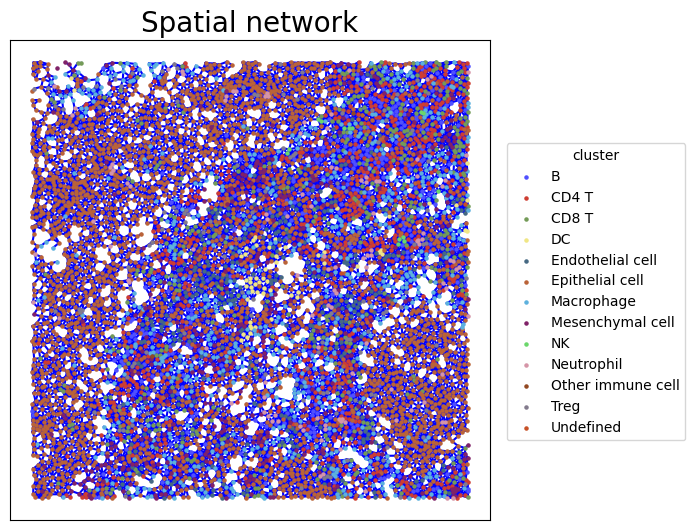

In [4]:
sp.pl.show_network(
    adata=adata_com, 
    sample_key='sample', 
    sample_id='4', 
    cluster_key='cluster', 
    spot_size=5
)

## Neighborhood analysis

Continue to use sample 4 as an example to carry out the neighborhood analysis used `sp.tl.neighborhood_analysis()` after removing the influence of self-connected edges.

In [5]:
sp.tl.neighborhood_analysis(
    adata_com, 
    cluster_key='cluster', 
    sample_key='sample', 
    sample='4', 
    n_iters=100
)

AnnData object with n_obs × n_vars = 211649 × 44
    obs: 'sample', 'leiden', 'cluster'
    var: 'highly_variable'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'var_for_clustering', 'SOAPy'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Illustration show the neighborhood score of all samples for all paired cell types, with positive or negative scores corresponding to co-localization or avoidance. Different immune cells types such as B, CD4 T, CD8 T and macrophage have significant co-localization in sample 4, which may relate with the formation of inflammatory foci.

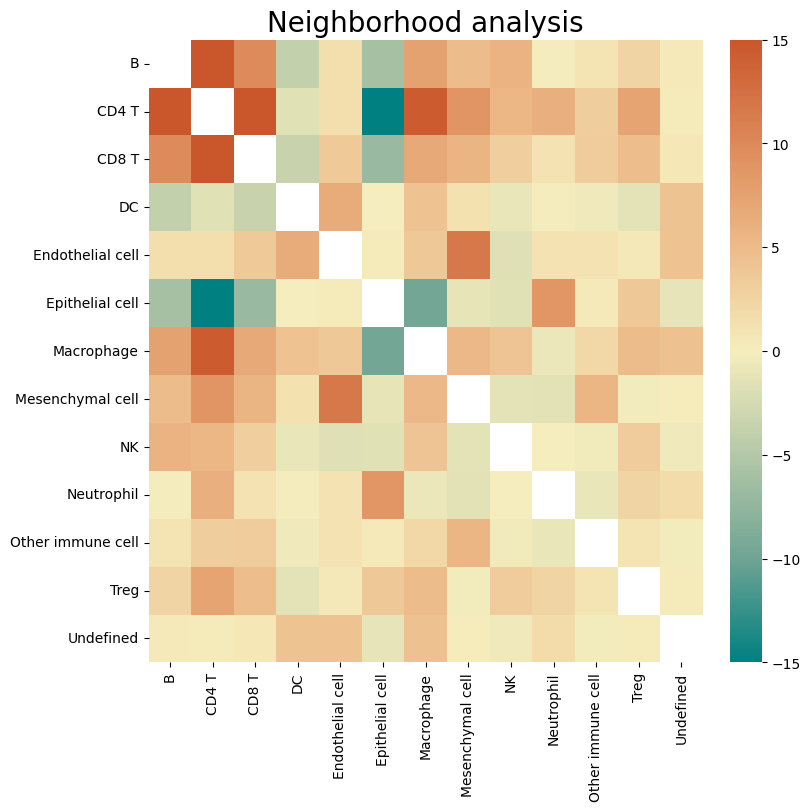

In [6]:
sp.pl.show_neighborhood_analysis(
    adata=adata_com, 
    sample_id='4', 
    vmax=15, 
    vmin=-15
)

It was also confirmed from the Voronoi map of sample 4 that the immune cells showed a high degree of co-localization.

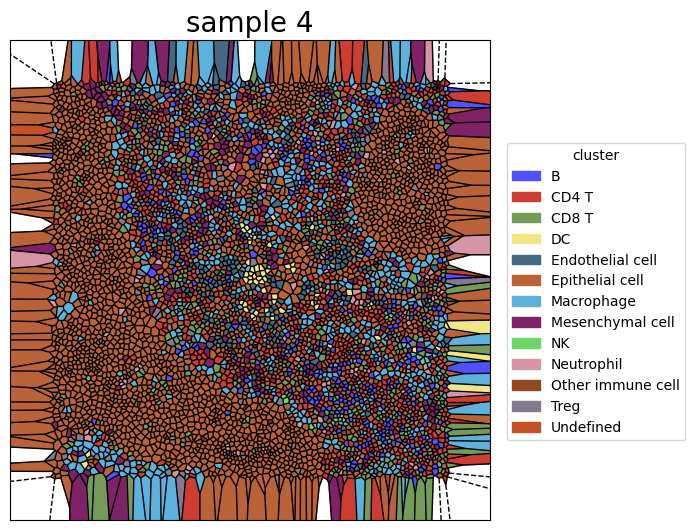

In [7]:
sp.pl.show_voronoi(
    adata=adata_com, 
    sample_id = '4', 
    cluster_key='cluster', 
    title = 'sample 4'
)

## Infiltration analysis

In tumor tissues, parenchymal cells are the major cell types, infiltration of non-parenchymal (immune or stromal) cells is important for studying microenvironment. `sp.tl.infiltration_analysis()` can show the extent of infiltration of non-parenchymal cells into parenchymal cells.

In [8]:
sp.tl.infiltration_analysis(
    adata_com,
    cluster_key='cluster',
    sample_key='sample'
)

AnnData object with n_obs × n_vars = 211649 × 44
    obs: 'sample', 'leiden', 'cluster'
    var: 'highly_variable'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'var_for_clustering', 'SOAPy'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

When there are too few mesenchymal cells in the sample (less than 200), it was usually directly considered as the cold interaction. The rest of the samples can be measured by the infiltration analysis to measure the degree of infiltration of mesenchymal cells into the epithelium cells.

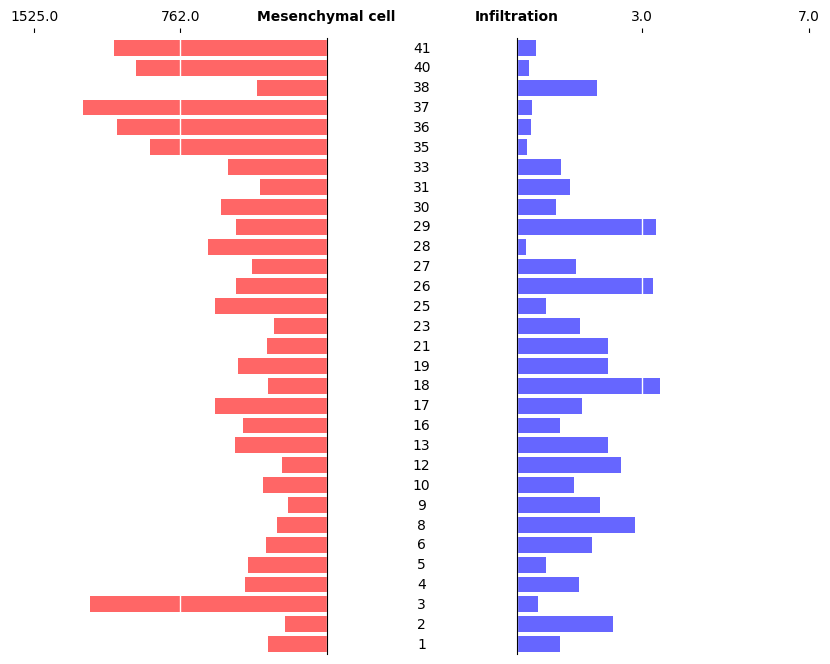

In [9]:
sp.pl.show_infiltration_analysis(
    adata=adata_com,
    parenchyma='Epithelial cell',
    nonparenchyma='Mesenchymal cell',
    figsize=(10, 8), 
    min_nonparenchyma=200
)

Samples with higher and lower infiltration scores indicate mixed and compartmentalized patterns between malignant epithelial cells and mesenchymal cells respectively.
Here we hold out sample 28 as the presentation of the compartmentalized pattern and sample 29 as the presentation of the mixed pattern.

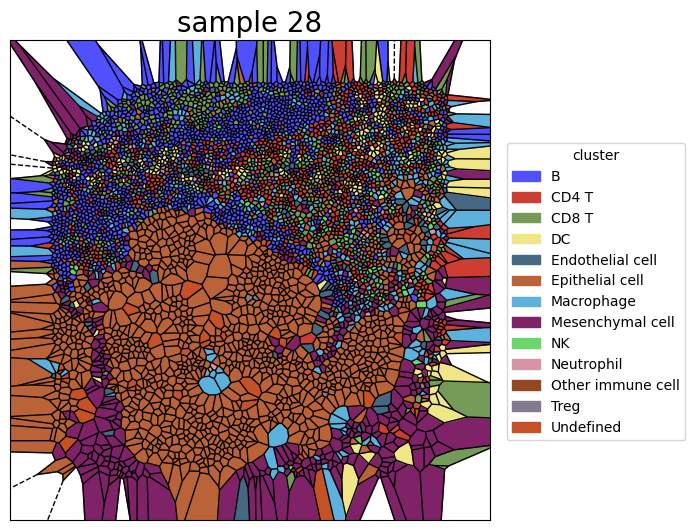

In [10]:
# compartmentalized pattern
sp.pl.show_voronoi(
    adata_com, 
    sample_id = '28',
    cluster_key='cluster', 
    title = 'sample 28'
)

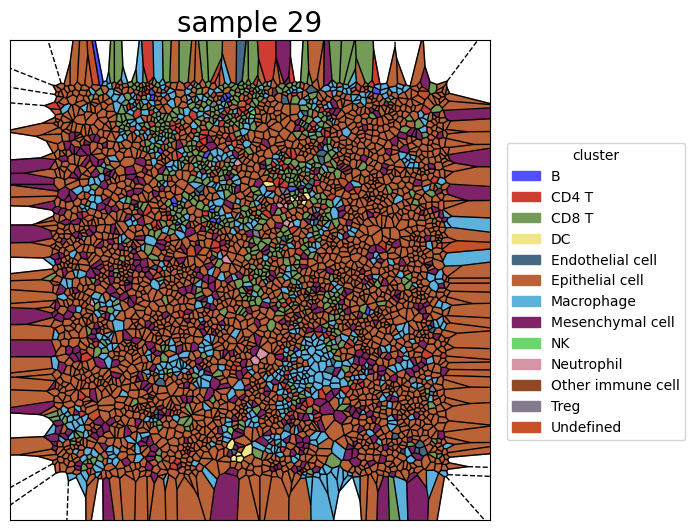

In [11]:
# mixed pattern
sp.pl.show_voronoi(
    adata_com, 
    sample_id = '29', 
    cluster_key='cluster', 
    title = 'sample 29'
)